In [54]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
print(pd.__version__)

df_original = pd.read_csv('Diabetes.csv')
print(type(df_original))

profile = ProfileReport(df_original)
profile

2.1.4
<class 'pandas.core.frame.DataFrame'>


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [78]:
df = df_original.copy()
df = df.dropna()

df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

# Dropping rows with 'no info' in smoking history
df = df[df['smoking_history'] != 'No Info']

# Mapping smoking history categories to numeric values
smoking_rank_map = {
    'never': 1,    # Example: never smoked = 1
    'former': 2,   # Example: former smoker = 2
    'current': 3,  # Example: current smoker = 3
    'ever': 4      # Example: ever smoked = 4
}

# Creating a new column 'smoke_rank' with the numeric values
df['smoking_history_rank'] = df['smoking_history'].map(smoking_rank_map)

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Remove rows with null BMI values
df.dropna(subset=['bmi'], inplace=True)

# Apply the function to create a new column 'bmi_result'
df['bmi_result'] = df['bmi'].apply(categorize_bmi)

df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_rank,bmi_result
553,0,80,0,0,never,27.32,6.5,140.0,1,1.0,Overweight
68,0,58,0,1,former,37.36,5.0,100.0,0,2.0,Obese
614,1,50,0,1,never,26.32,7.0,240.0,1,1.0,Overweight
638,0,58,0,0,former,32.38,6.6,159.0,1,2.0,Obese
467,0,69,0,1,current,30.44,8.8,220.0,1,3.0,Obese


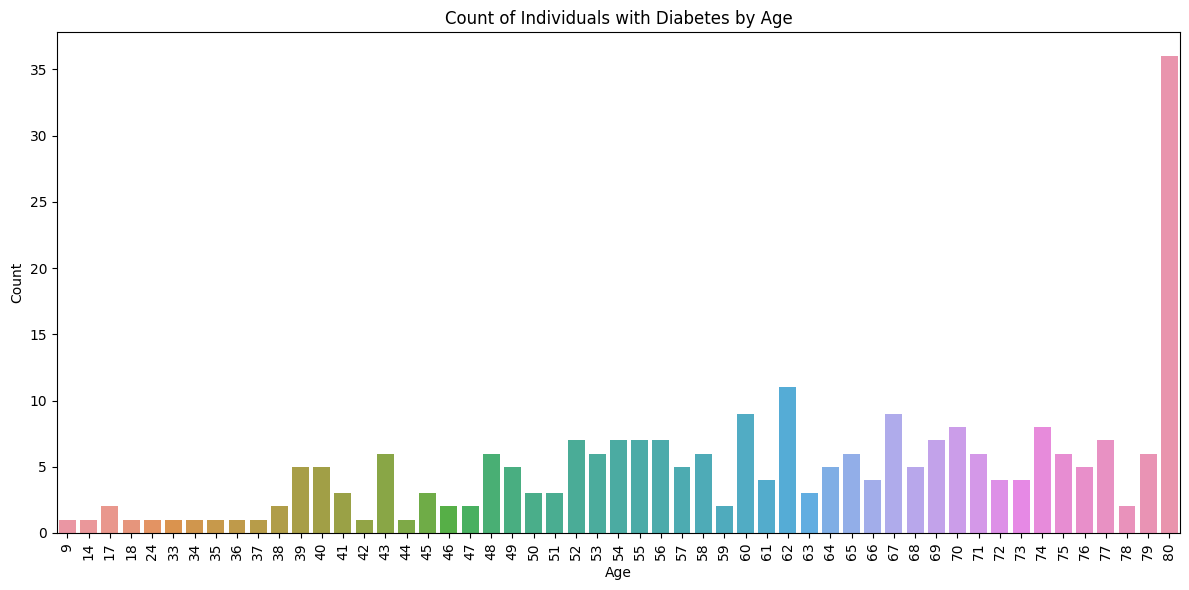

In [74]:
diabetic_individuals = df[df['diabetes'] == 1]

# Create a count plot to visualize the number of individuals with diabetes at each age category
plt.figure(figsize=(12, 6))
sns.countplot(x='age', data=diabetic_individuals)
plt.title('Count of Individuals with Diabetes by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability if there are many age groups
plt.tight_layout()  # Adjust the layout to fit the x-axis labels
plt.show()

diabetes    0    1
gender            
Female    166  150
Male      172  153


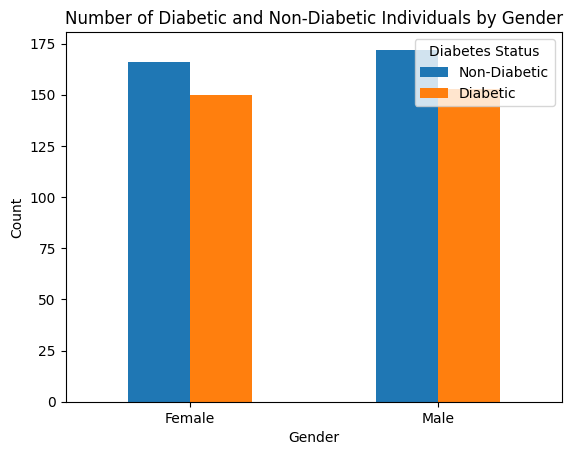

In [58]:
# Count the number of diabetic and non-diabetic individuals in each gender category
diabetes_counts = df.groupby(['gender', 'diabetes']).size().unstack()
print(diabetes_counts)
# Plotting
diabetes_counts.plot(kind='bar', stacked=False)

plt.title('Number of Diabetic and Non-Diabetic Individuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotates the x-axis labels to be horizontal
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Diabetic'])
plt.show()

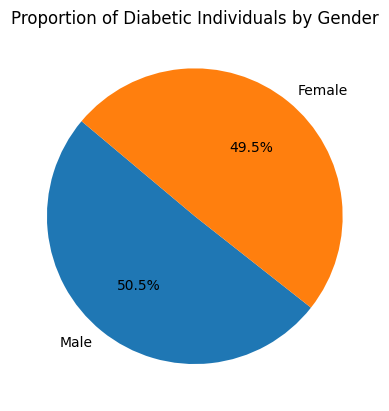

In [59]:
# Pie Chart of Diabetic Individuals by Gender
diabetic_individuals = df[df['diabetes'] == 1]['gender'].value_counts()
diabetic_individuals.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Diabetic Individuals by Gender')
plt.ylabel('')  
plt.show()

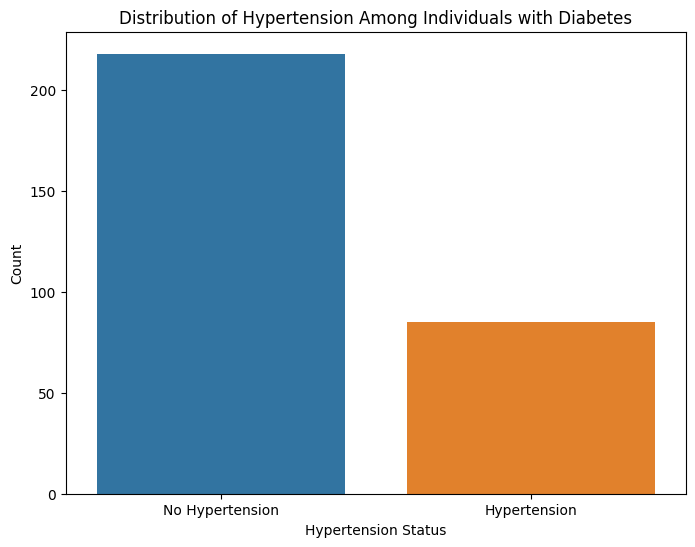

In [60]:
# Filtering the dataset for individuals with diabetes
diabetes_hypertension = df[df['diabetes'] == 1]['hypertension']

# Plotting the distribution of hypertension among diabetic individuals
plt.figure(figsize=(8, 6))
sns.countplot(x=diabetes_hypertension)
plt.title('Distribution of Hypertension Among Individuals with Diabetes')
plt.xlabel('Hypertension Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Hypertension', 'Hypertension'])
plt.show()

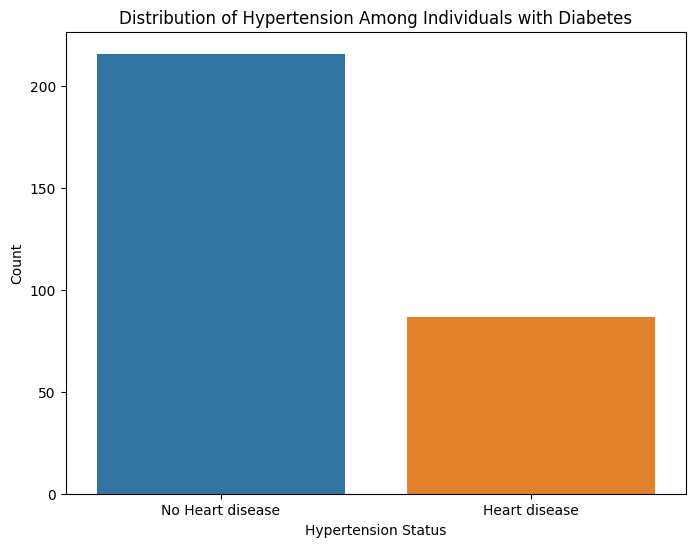

In [61]:
# Filtering the dataset for individuals with diabetes
diabetes_hypertension = df[df['diabetes'] == 1]['heart_disease']

# Plotting the distribution of hypertension among diabetic individuals
plt.figure(figsize=(8, 6))
sns.countplot(x=diabetes_hypertension)
plt.title('Distribution of Hypertension Among Individuals with Diabetes')
plt.xlabel('Hypertension Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Heart disease', 'Heart disease'])
plt.show()

In [80]:
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_rank,bmi_result
485,1,80,0,1,never,22.21,6.1,200.0,0,1.0,Normal weight
96,0,77,0,1,not current,26.76,6.5,200.0,1,NaN,Overweight
490,1,60,0,0,current,40.18,9.0,300.0,1,3.0,Obese
269,0,74,0,1,former,30.52,6.1,85.0,0,2.0,Obese
10,0,68,0,1,former,27.52,6.5,240.0,1,2.0,Overweight


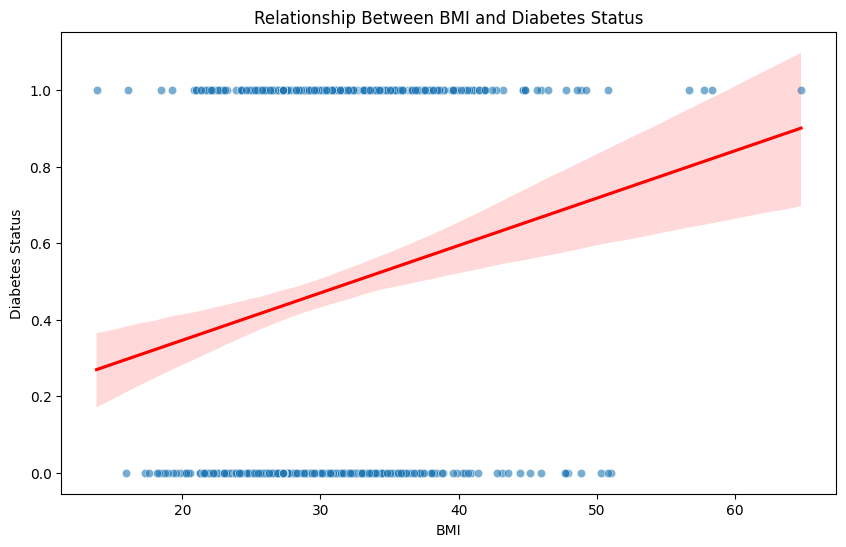

In [63]:
# Creating a scatter plot with a trend line to show the relationship between BMI and diabetes status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='diabetes', data=df, alpha=0.6)
sns.regplot(x='bmi', y='diabetes', data=df, scatter=False, color='red')
plt.title('Relationship Between BMI and Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Diabetes Status')
plt.show()

C:\Users\sunio\AppData\Local\Temp\ipykernel_8\3028637990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ordered_df['smoking_history'] = pd.Categorical(filtered_ordered_df['smoking_history'],
C:\Users\sunio\AppData\Local\Temp\ipykernel_8\3028637990.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoking_diabetes_counts_ordered = filtered_ordered_df.groupby(['smoking_history', 'diabetes']).size().unstack()


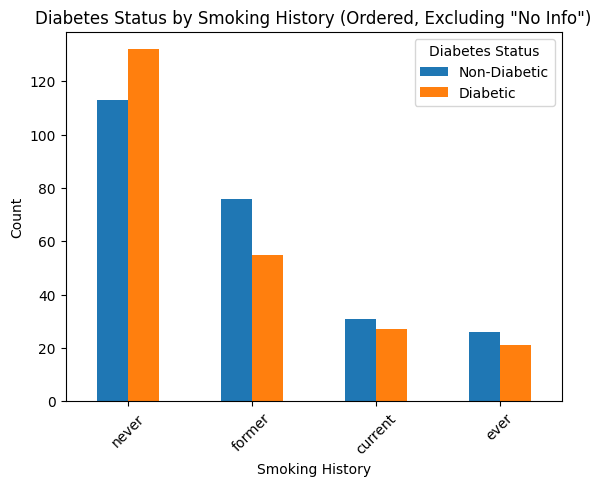

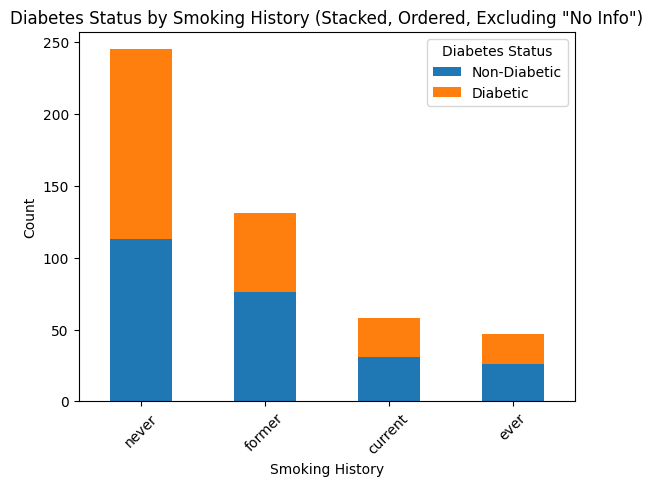

In [64]:
# Filtering out 'no info' and ordering the categories
smoking_categories = ['never', 'former', 'current', 'ever']
filtered_ordered_df = df[df['smoking_history'].isin(smoking_categories)]
filtered_ordered_df['smoking_history'] = pd.Categorical(filtered_ordered_df['smoking_history'], 
                                                        categories=smoking_categories, 
                                                        ordered=True)

# Preparing the data for plotting with ordered categories
smoking_diabetes_counts_ordered = filtered_ordered_df.groupby(['smoking_history', 'diabetes']).size().unstack()

# Grouped Bar Chart with ordered categories
smoking_diabetes_counts_ordered.plot(kind='bar', stacked=False)
plt.title('Diabetes Status by Smoking History (Ordered, Excluding "No Info")')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Diabetic'])
plt.show()

# Stacked Bar Chart with ordered categories
smoking_diabetes_counts_ordered.plot(kind='bar', stacked=True)
plt.title('Diabetes Status by Smoking History (Stacked, Ordered, Excluding "No Info")')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Diabetic'])
plt.show()

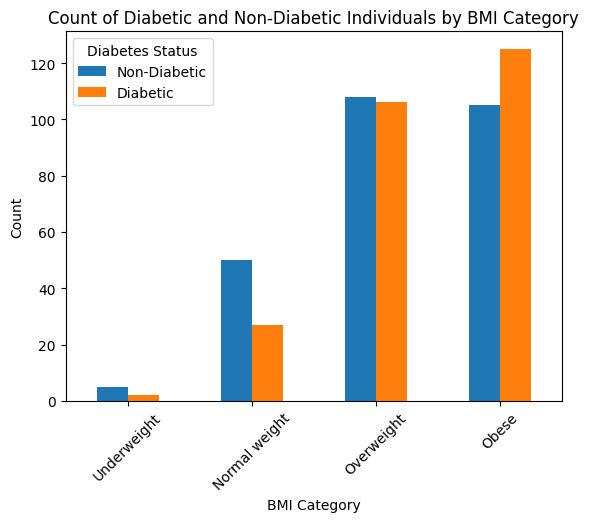

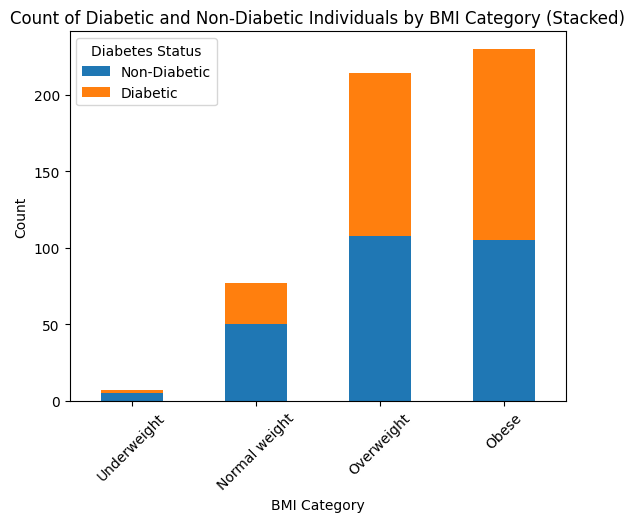

In [86]:
# Order the BMI categories
ordered_bmi_categories = ['Underweight', 'Normal weight', 'Overweight', 'Obese']

# Group and count data by BMI categories and diabetes status
bmi_diabetes_counts = df.groupby(['bmi_result', 'diabetes']).size().unstack().reindex(ordered_bmi_categories)

# Plotting
# Grouped Bar Chart
bmi_diabetes_counts.plot(kind='bar', stacked=False)
plt.title('Count of Diabetic and Non-Diabetic Individuals by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Diabetic'])
plt.show()

# Stacked Bar Chart
bmi_diabetes_counts.plot(kind='bar', stacked=True)
plt.title('Count of Diabetic and Non-Diabetic Individuals by BMI Category (Stacked)')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Diabetic'])
plt.show()

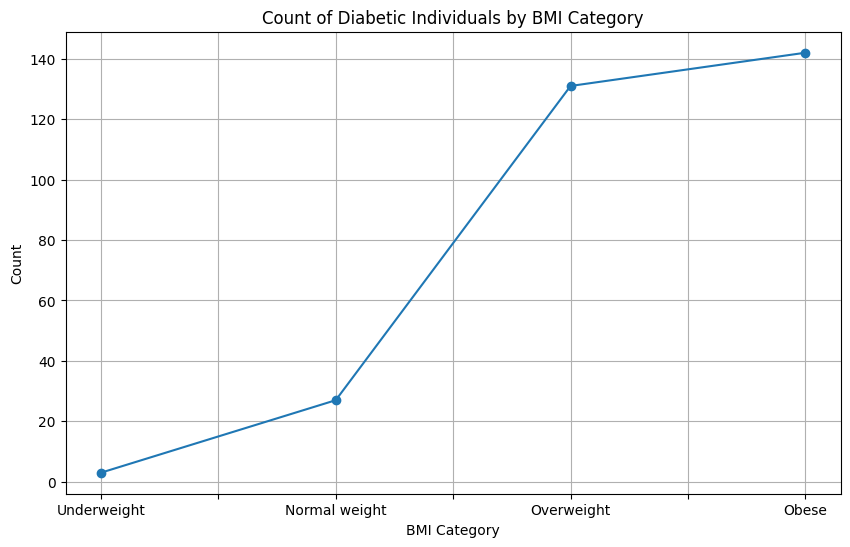

In [67]:
# Define a function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Remove rows with null BMI values
df.dropna(subset=['bmi'], inplace=True)

# Apply the function to create a new column 'bmi_result'
df['bmi_result'] = df['bmi'].apply(categorize_bmi)

# Filter for only diabetic individuals
diabetic_df = df[df['diabetes'] == 1]

# Count the number of diabetic individuals in each BMI category
bmi_counts = diabetic_df['bmi_result'].value_counts().reindex(['Underweight', 'Normal weight', 'Overweight', 'Obese'])

# Create a line plot
plt.figure(figsize=(10, 6))
bmi_counts.plot(kind='line', marker='o')
plt.title('Count of Diabetic Individuals by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()

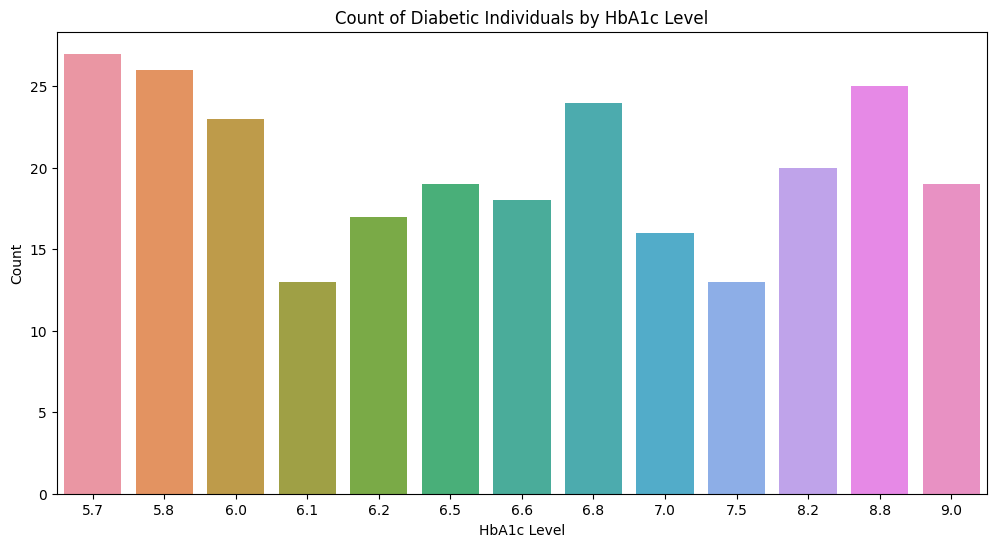

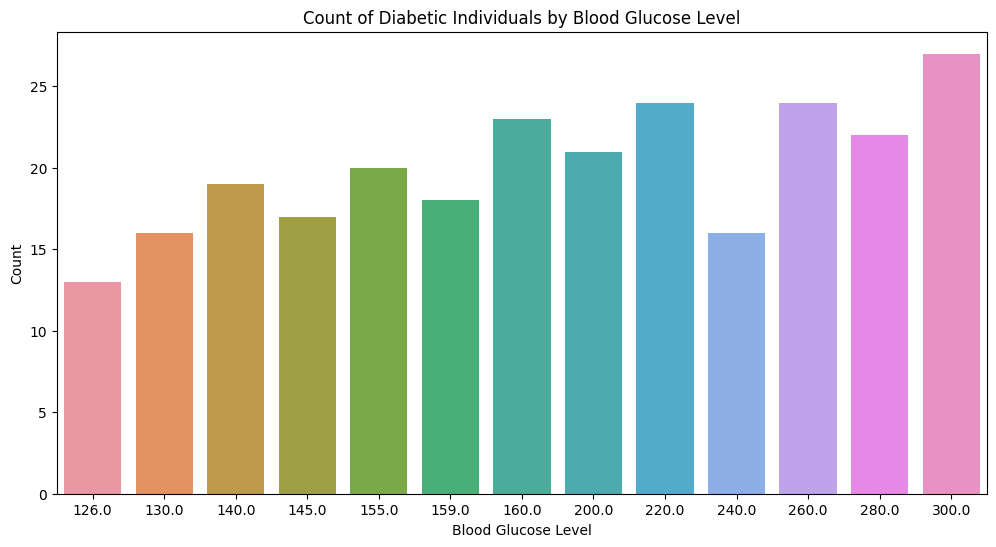

In [99]:
# Filter for diabetic individuals
df_diabetic = df[df['diabetes'] == 1]

# Plotting HbA1c levels for diabetic individuals
plt.figure(figsize=(12, 6))
sns.countplot(x='HbA1c_level', data=df_diabetic)
plt.title('Count of Diabetic Individuals by HbA1c Level')
plt.xlabel('HbA1c Level')
plt.ylabel('Count')
plt.show()

# Plotting blood glucose levels for diabetic individuals
plt.figure(figsize=(12, 6))
sns.countplot(x='blood_glucose_level', data=df_diabetic)
plt.title('Count of Diabetic Individuals by Blood Glucose Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Count')
plt.show()

In [68]:
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_result
641,Female,43,1,0,never,34.21,6.5,160.0,1,Obese
631,Female,80,0,1,former,31.46,3.5,85.0,0,Obese
533,Female,71,1,0,not current,24.18,4.0,155.0,0,Normal weight
56,Female,66,0,1,current,32.65,6.5,80.0,0,Obese
598,Male,57,1,0,never,41.93,5.7,300.0,1,Obese


In [69]:
import statsmodels.api as sm
x = df['blood_glucose_level']
y = df['diabetes']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     319.3
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           3.21e-58
Time:                        16:10:10   Log-Likelihood:                -334.40
No. Observations:                 641   AIC:                             672.8
Df Residuals:                     639   BIC:                             681.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3352    

In [70]:
# Dropping rows with 'no info' in smoking history
df = df[df['smoking_history'] != 'No Info']

# Mapping smoking history categories to numeric values
smoking_rank_map = {
    'never': 1,    # Example: never smoked = 1
    'former': 2,   # Example: former smoker = 2
    'current': 3,  # Example: current smoker = 3
    'ever': 4      # Example: ever smoked = 4
}

# Creating a new column 'smoke_rank' with the numeric values
df['smoking_history_rank'] = df['smoking_history'].map(smoking_rank_map)

# Display the first few rows of the updated DataFrame
print(df.head())

   gender  age  hypertension  heart_disease smoking_history    bmi  \
0    Male   67             0              1     not current  27.32   
1    Male   63             1              0           never  32.76   
2  Female   69             1              1           never  22.15   
3    Male   56             0              1          former  32.11   
4    Male   52             1              1            ever  41.05   

   HbA1c_level  blood_glucose_level  diabetes     bmi_result  \
0          6.5                200.0         1     Overweight   
1          6.5                155.0         0          Obese   
2          6.6                260.0         1  Normal weight   
3          5.7                160.0         1          Obese   
4          6.2                200.0         1          Obese   

   smoking_history_rank  
0                   NaN  
1                   1.0  
2                   1.0  
3                   2.0  
4                   4.0  


In [84]:
# Selecting predictors and the outcome variable

X = df[["age","gender","hypertension","heart_disease","smoking_history_rank", "bmi", "HbA1c_level", "blood_glucose_level"]]
y = df["diabetes"]

# Handling missing values (optional, based on your dataset)
X = X.dropna()
y = y[X.index]  # Ensure y has corresponding rows to X

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     83.96
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           8.99e-86
Time:                        21:19:45   Log-Likelihood:                -136.13
No. Observations:                 481   AIC:                             290.3
Df Residuals:                     472   BIC:                             327.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.9325 

Age > 0.05
smoking_history_rank > 0.05
เพราะฉะนั้นยอมรับ H0 = ไม่เอามารวมใน model

In [85]:
# Selecting predictors and the outcome variable
X = df[["hypertension","heart_disease", "bmi", "HbA1c_level", "blood_glucose_level"]]
y = df["diabetes"]

# Handling missing values (optional, based on your dataset)
X = X.dropna()
y = y[X.index]  # Ensure y has corresponding rows to X

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     147.9
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           1.41e-97
Time:                        21:24:23   Log-Likelihood:                -150.23
No. Observations:                 528   AIC:                             312.5
Df Residuals:                     522   BIC:                             338.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.9101    

In [98]:
import scipy.stats as stats

# Splitting the dataset into two groups
group1 = df[df['diabetes'] == 1]['bmi']  # Diabetic individuals
group2 = df[df['diabetes'] == 0]['bmi']  # Non-diabetic individuals

statistic1, p_value1 = stats.shapiro(group1)
statistic2, p_value2 = stats.shapiro(group2)

print(f"statistic1: {statistic1}, p_value1: {p_value1}")
print(f"statistic2: {statistic2}, p_value2: {p_value2}")


u_statistic, u_p_value = stats.mannwhitneyu(group1.dropna(), group2.dropna())

print("Mann-Whitney U test statistic:", u_statistic)
print("P-value:", u_p_value)


statistic1: 0.9422594904899597, p_value1: 1.3836563894642495e-08
statistic2: 0.9484157562255859, p_value2: 4.093081784617425e-08
Mann-Whitney U test statistic: 40238.5
P-value: 0.0020398990301492537
